In [1]:
# https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

In [4]:
# import dependencies

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette() # Return a list of colors or 
                            # continuous colormap defining a palette.
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

from subprocess import check_output
print(check_output(["ls", "./Data"]).decode("utf8"))

data_description.txt
sample_submission.csv
test.csv
train.csv



In [5]:
# lets import train and test set
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [6]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [7]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- we wont needing the ID column, as we will be using default indexing

In [10]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

## Data Processing

### Outliers

Lets explore the outliers

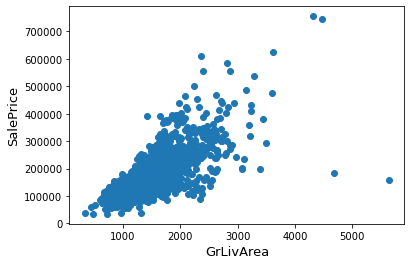

In [13]:
fig,ax = plt.subplots() # 1 row, 1 col by default
# Above grade (ground) living area square feet : GrLivArea
ax.scatter(x=train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()